# CC3001 Otoño 2023 Tarea 1 [Jorge Espinosa V]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian

# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante. 

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.


Escriba a continuación la definición de su función:

In [ ]:
#Importamos librerias

import numpy as np
import math
from matplotlib import pyplot as plt

In [ ]:
# Creamos una funcion para que redondee L al numero natural de arriba.
def redondeo(n):
    n1 = math.floor(n) + 1
    return n1

# Creamos una funcion para saber si es par o impar, si es par (n) que devuelva n+1 (impar).
def esImpar(n):
    if n % 2 == 0:
        return n + 1
    else:
        return n

# Creamos una funcion auxiliar para calcular las dimensiones del tablero (LxL) y que L sea impar para que tenga centro.
def dimensionTablero(N):
    pi = math.pi
    L1 = 2*math.sqrt(N/pi) + 1
    L2 = redondeo(L1)
    L3 = esImpar(L2)
    tablero = np.zeros([L3, L3], dtype = int)
    return tablero, L3


In [ ]:
def arena(N):
  # escriba su código aquí
  tablero, L = dimensionTablero(N)
  centro = int((L - 1)/2)
  tablero[centro, centro] = N
  total_derrumbes = 0
  while any(cell >= 4 for fila in tablero for cell in fila):
    for y in range(0,L-1):
      for x in range(0,L-1):
        if tablero[x, y] >= 4:
            tablero[x, y] -= 4
            total_derrumbes += 1
            if x < (L-1) and y < (L-1):
                tablero[x + 1, y] += 1
                tablero[x - 1, y] += 1
                tablero[x, y + 1] += 1
                tablero[x, y - 1] += 1
                
  return tablero, total_derrumbes

Explique aquí cómo calculó el tamaño que necesita tener el tablero.

Para calcular el tamaño del tablero primero resolví la siguiente ecuación, $N=\pi\cdot L^{2}$, así poder conocer el radio del círculo formado por los $N$ granos de arena ingresados, por ende en el máximo caso en que cada celda quede con 1 grano, este "círculo" tendrá un área $\pi\cdot L^{2}$ y el tablero un largo y ancho de $2L$.

Ahora ejecute la función para $N=128$:

El total de derrumbes fueron: 342


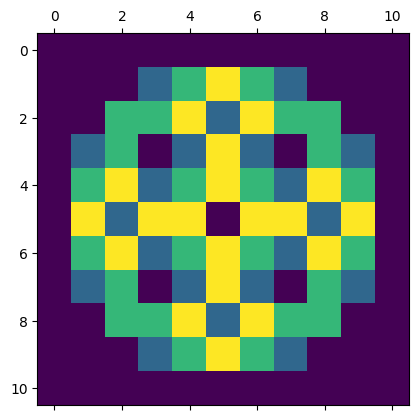

In [ ]:
tablero, total_derrumbes = arena(128)

plt.matshow(tablero)
print("El total de derrumbes fueron:", total_derrumbes)



A continuación ejecute la función para el valor más grande de  N  que consiga alcanzar en un tiempo razonable:

El total de derrumbes fueron: 160833632


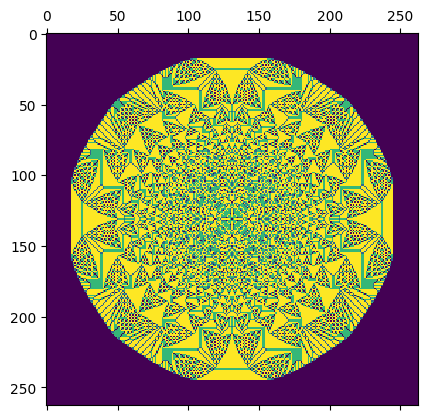

In [ ]:
 # reemplace N por el valor máximo que alcanzó a procesar
tablero, total_derrumbes = arena(50000)

plt.matshow(tablero)
print("El total de derrumbes fueron:", total_derrumbes)

#El N maximo que logré procesar fue N = 50.000, en un tiempo de 4m 13.1s

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.

In [ ]:
def arena2(N):
  # escriba su código aquí
  tablero, L = dimensionTablero(N)
  centro = int((L - 1)/2)
  tablero[centro, centro] = N
  total_derrumbes = 0
  while any(cell >= 4 for fila in tablero for cell in fila):
    for y in range(0,L-1):
      for x in range(0,L-1):
        if tablero[x, y] >= 4:
          m = tablero[x, y]//4
          tablero[x, y] -= 4*m
          total_derrumbes += 1
          if x < (L-1) and y < (L-1):
              tablero[x + 1, y] += m
              tablero[x - 1, y] += m
              tablero[x, y + 1] += m
              tablero[x, y - 1] += m

            
  return tablero, total_derrumbes
  

Ahora ejecute la función para $N=128$:

El total de derrumbes fueron: 227


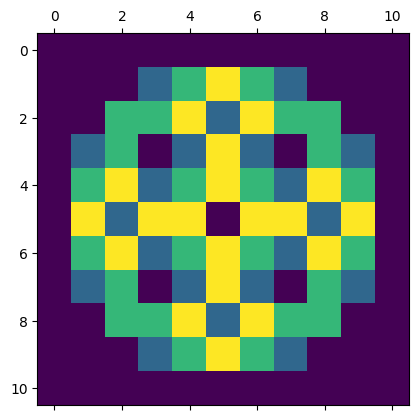

In [ ]:

tablero2, total_derrumbes2 = arena2(128)

plt.matshow(tablero2)
print("El total de derrumbes fueron:", total_derrumbes2)



A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

In [ ]:
# reemplace N por el valor máximo que alcanzó a procesar
tablero2, total_derrumbes2 = arena2(95000)

plt.matshow(tablero2)
print("El total de derrumbes fueron:", total_derrumbes2)

#El N maximo que logré procesar fue N = 95.000, en un tiempo de 4m 19.8s

KeyboardInterrupt: 

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Para la función `arena()` tenemos:

| $N$ | Tiempo $(s)$ |
|-----|--------|
| 128 | 0,2 |
| 500 | 0,3 |
| 1.000 | 0,3 |
| 1.500 | 0,4 |
| 2.000 | 0,5 |
| 3.000 | 1 |
| 5.000 | 2,3 |
| 7.500 | 5 |
| 10.000 | 9,2 |
| 15.000 | 20,8 |
| 25.000 | 69 |
| 50.000 | 253,1 |
| 65.000 | 451 |
| 95.000 | 1.386,9 |

Para la función `arena2()` tenemos:
| $N$ | Tiempo $(s)$ |
|-----|--------------|
| 128 | 0,2 |
| 500 | 0,2 |
| 1.000 | 0,2 |
| 1.500 | 0,2 |
| 2.000 | 0,3 |
| 3.000 | 0,4 |
| 5.000 | 0,8 |
| 7.500 | 1,6 |
| 10.000 | 2,7 |
| 15.000 | 6 |
| 25.000 | 15 |
| 50.000 | 62,2 |
| 65.000 | 103 |
| 95.000 | 259,8 |

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

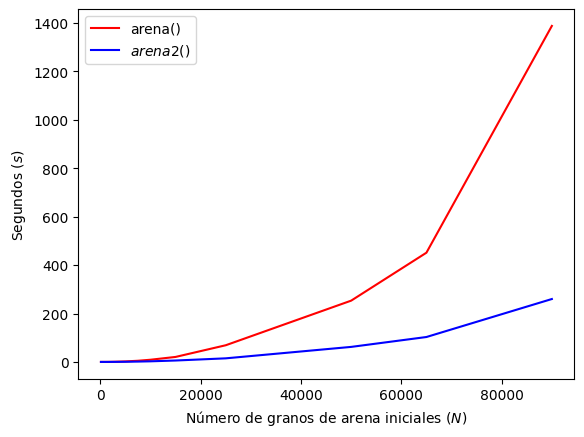

In [ ]:
N = [128, 500, 1000, 1500, 2000, 3000, 5000, 7500, 10000, 15000, 25000, 50000, 65000, 90000]

s1 = [0.2, 0.3, 0.3, 0.4, 0.5, 1, 2.3, 5, 9.2, 20.8, 69, 253.1, 451, 1386.9]

s2 = [0.2,0.2,0.2,0.2, 0.3, 0.4, 0.8, 1.6, 2.7, 6, 15, 62.2, 103, 259.8]


fig, ax = plt.subplots()

ax.plot(N, s1, color="red", label="arena()")
ax.plot(N, s2, color="blue", label="$arena2()$")
ax.set_ylabel("Segundos $(s)$")
ax.set_xlabel("Número de granos de arena iniciales ($N$)")
ax.legend()

plt.show()

### Discusión

Como podemos ver en los gráficos, claramente valió la pena la optimización sobre todo cuando $N$ crece exponencialmente.

Otra optimización que se puede lograr, de hecho de esta manera aborde inicialmente el algoritmo, es de manera que no se recorra todas las celdas desde el inicio, sino que se recorran las celdas en la medida que se van derrumbando, la forma en que se recorra el tablero debiese ser similar a un espiral, así no recorrer celdas que claramente serán 0 al inicio. 


# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.